In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

We can find 4 different way to segment an image using OpenCV or/ and sckitlearn:

    - Image segmentation by Kmeans
    - Image segmentation by Thresholding
    - Image segmentation by edge detection
    - Image segmentation by color masking


# Image segmentation by Kmeans

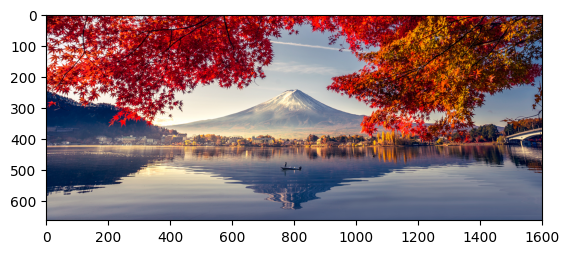

In [2]:
img = cv2.imread("land.jpg")
img_brg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_brg)  

## Preprocessing

We reshaped the image from (x, x, 3) to (X*X, 3) and convert it to float datatype

In [3]:
to2dim_img = img_brg.reshape((-1, 3))
to2dim_img = np.float32(to2dim_img)

## Defining Kmean hyperparameter

Now we define the criteria of segmentation, the rules with the Kmeans algorithm use to clusterpixels

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) #  tuple of type, max_iteration and epsilon of the criteria
K = 2  # initial K differente cluster
attempts=10 # nbre of attempts

## Applying Kmeans for Image Segmentation

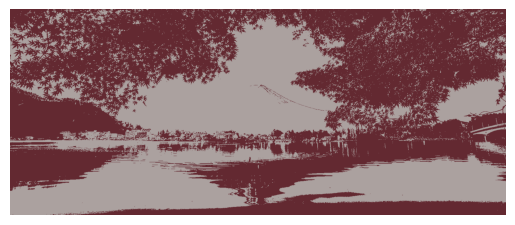

In [5]:
ret, labels, center = cv2.kmeans(to2dim_img, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[labels.flatten()]
result_img = res.reshape((img_brg.shape))

plt.axis('off')
plt.imshow(result_img)

# Image Segmentation using Contour Detection

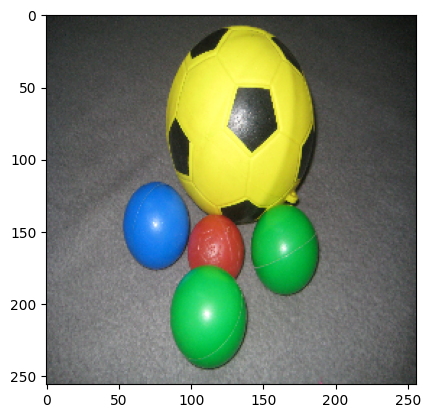

In [11]:
img = cv2.imread("ball.jpg")
img_brg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_brg = cv2.resize(img_brg,(256,256))
plt.imshow(img_brg)  

resized to (256, 256) because we gonna use a mask with the same shape 

## Applying image thresholding 

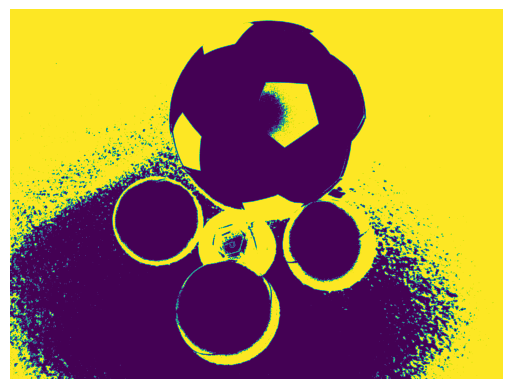

In [13]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

## Applying edge detection

now we apply dilation operation to detect edges

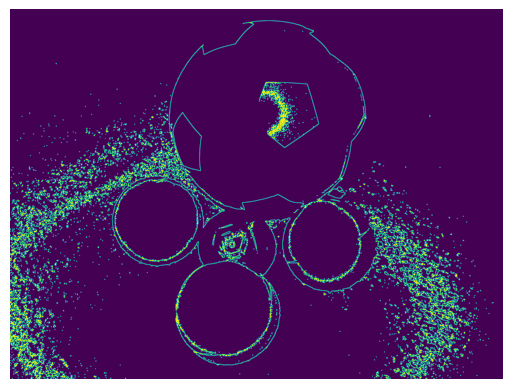

In [14]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

## Detecting contours to create mask

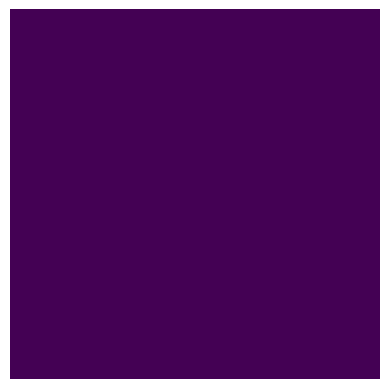

In [16]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)